In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('nfl_data_preprocessed.csv')
raw_data.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,weather_humidity,score_total,over_under_diff,over,under,home_diff,home_win,away_win,fav_win,fav_beat_spread
0,09/03/2000,2000,1,False,Buffalo Bills,16.0,13.0,Tennessee Titans,Buffalo Bills,-1.0,...,82,29.0,-11.0,0,1,3.0,1,0,1,1
1,09/03/2000,2000,1,False,Cleveland Browns,7.0,27.0,Jacksonville Jaguars,Jacksonville Jaguars,-10.5,...,86,34.0,-4.5,0,1,-20.0,0,1,1,1
2,09/03/2000,2000,1,False,Dallas Cowboys,14.0,41.0,Philadelphia Eagles,Dallas Cowboys,-6.0,...,32,55.0,15.5,1,0,-27.0,0,1,0,0
3,09/03/2000,2000,1,False,Green Bay Packers,16.0,20.0,New York Jets,Green Bay Packers,-2.5,...,87,36.0,-8.0,0,1,-4.0,0,1,0,0
4,09/03/2000,2000,1,False,Kansas City Chiefs,14.0,27.0,Indianapolis Colts,Indianapolis Colts,-3.5,...,51,41.0,-3.0,0,1,-13.0,0,1,1,1


### Filtering Data to work with

In [3]:
df = raw_data.copy()

In [4]:
df_features = df[['schedule_season', 'team_home', 'team_away', 'team_favorite_id', 'spread_favorite', 'over_under_line', 'weather_wind_mph']]
df_home_score = df[['score_home']]
df_away_score = df[['score_away']]

### Encoding the labeled data

In [5]:
import sklearn
from sklearn import linear_model, preprocessing

In [6]:
le = preprocessing.LabelEncoder()

In [7]:
team_home = le.fit_transform(list(df_features['team_home']))
team_away = le.fit_transform(list(df_features['team_away']))
team_favorite_id = le.fit_transform(list(df_features['team_favorite_id']))
schedule_season = list(df_features['schedule_season'])
spread_favorite = list(df_features['spread_favorite'])
over_under_line = list(df_features['over_under_line'])
weather_wind_mph = list(df_features['weather_wind_mph'])
home_score = list(df_home_score['score_home'])
away_score = list(df_away_score['score_away'])

In [8]:
df_features = list(zip(team_home, team_away, team_favorite_id, schedule_season, spread_favorite, over_under_line, weather_wind_mph))
df_home_score = np.ravel(list(zip(home_score)))
df_away_score = np.ravel(list(zip(away_score)))

In [9]:
df_features

[(2, 30, 3, 2000, -1.0, 40.0, 7.0),
 (6, 14, 14, 2000, -10.5, 38.5, 8.0),
 (7, 25, 8, 2000, -6.0, 39.5, 7.0),
 (9, 23, 11, 2000, -2.5, 44.0, 13.0),
 (12, 13, 13, 2000, -3.5, 44.0, 9.0),
 (14, 28, 18, 2000, -2.0, 36.0, 9.0),
 (15, 29, 30, 2000, -3.0, 36.0, 8.0),
 (17, 0, 22, 2000, -6.5, 40.0, 7.0),
 (19, 16, 24, 2000, -6.5, 39.5, 12.0),
 (21, 2, 2, 2000, -2.5, 37.0, 5.0),
 (26, 4, 32, 2000, -10.5, 47.5, 7.0),
 (0, 8, 0, 2000, -3.0, 38.5, 5.0),
 (1, 14, 2, 2000, -3.0, 36.5, 4.0),
 (2, 11, 3, 2000, -6.0, 38.5, 7.0),
 (5, 7, 6, 2000, -6.0, 40.5, 7.0),
 (8, 1, 9, 2000, -4.5, 47.0, 10.0),
 (20, 22, 26, 2000, -3.0, 39.5, 7.0),
 (13, 21, 16, 2000, -5.5, 35.5, 7.0),
 (22, 4, 4, 2000, -3.0, 48.0, 11.0),
 (23, 17, 17, 2000, -7.5, 46.0, 8.0),
 (24, 5, 30, 2000, -7.0, 36.5, 9.0),
 (25, 15, 31, 2000, -8.5, 38.5, 8.0),
 (18, 20, 23, 2000, -6.5, 39.5, 9.0),
 (3, 1, 4, 2000, -6.0, 48.5, 8.0),
 (4, 22, 5, 2000, -2.0, 42.0, 10.0),
 (6, 26, 27, 2000, -2.5, 35.5, 14.0),
 (9, 25, 11, 2000, -4.0, 42.5, 9.0),

In [10]:
df_home_score

array([16.,  7., 14., ..., 27., 27., 16.])

In [11]:
df_away_score

array([13., 27., 41., ..., 24.,  9., 10.])

### Train Test Split

In [12]:
x_train_h, x_test_h, y_train_h, y_test_h = sklearn.model_selection.train_test_split(df_features, df_home_score, test_size = 0.1, random_state=18)
x_train_a, x_test_a, y_train_a, y_test_a = sklearn.model_selection.train_test_split(df_features, df_away_score, test_size = 0.1, random_state=18)

### KNN machine learning

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
model_h = KNeighborsClassifier(n_neighbors=6)

In [15]:
model_h.fit(x_train_h, y_train_h)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [16]:
acc_h = model_h.score(x_test_h, y_test_h)
acc_h

0.06844106463878327

In [17]:
predicted_h = model_h.predict(x_test_h)

In [18]:
for x in range(len(predicted_h)):
    print('Home Predicted: ', predicted_h[x], 'Home Actual: ', y_test_h[x])    

Home Predicted:  15.0 Home Actual:  28.0
Home Predicted:  45.0 Home Actual:  25.0
Home Predicted:  3.0 Home Actual:  26.0
Home Predicted:  9.0 Home Actual:  27.0
Home Predicted:  16.0 Home Actual:  21.0
Home Predicted:  10.0 Home Actual:  24.0
Home Predicted:  7.0 Home Actual:  17.0
Home Predicted:  20.0 Home Actual:  31.0
Home Predicted:  13.0 Home Actual:  20.0
Home Predicted:  30.0 Home Actual:  20.0
Home Predicted:  7.0 Home Actual:  20.0
Home Predicted:  7.0 Home Actual:  6.0
Home Predicted:  14.0 Home Actual:  24.0
Home Predicted:  28.0 Home Actual:  13.0
Home Predicted:  31.0 Home Actual:  28.0
Home Predicted:  16.0 Home Actual:  48.0
Home Predicted:  14.0 Home Actual:  31.0
Home Predicted:  7.0 Home Actual:  14.0
Home Predicted:  10.0 Home Actual:  38.0
Home Predicted:  10.0 Home Actual:  0.0
Home Predicted:  17.0 Home Actual:  31.0
Home Predicted:  13.0 Home Actual:  31.0
Home Predicted:  28.0 Home Actual:  7.0
Home Predicted:  14.0 Home Actual:  31.0
Home Predicted:  7.0 Home

In [19]:
model_a = KNeighborsClassifier(n_neighbors=6)

In [20]:
model_a.fit(x_train_a, y_train_a)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [21]:
acc_a = model_a.score(x_test_a, y_test_a)
acc_a

0.06844106463878327

In [22]:
predicted_a = model_a.predict(x_test_a)

In [23]:
for x in range(len(predicted_a)):
    print('Away Predicted: ', predicted_a[x], 'Away Actual: ', y_test_a[x]) 

Away Predicted:  14.0 Away Actual:  26.0
Away Predicted:  13.0 Away Actual:  30.0
Away Predicted:  34.0 Away Actual:  7.0
Away Predicted:  10.0 Away Actual:  0.0
Away Predicted:  14.0 Away Actual:  27.0
Away Predicted:  12.0 Away Actual:  30.0
Away Predicted:  16.0 Away Actual:  24.0
Away Predicted:  3.0 Away Actual:  13.0
Away Predicted:  6.0 Away Actual:  10.0
Away Predicted:  14.0 Away Actual:  21.0
Away Predicted:  13.0 Away Actual:  8.0
Away Predicted:  13.0 Away Actual:  28.0
Away Predicted:  7.0 Away Actual:  34.0
Away Predicted:  10.0 Away Actual:  24.0
Away Predicted:  7.0 Away Actual:  20.0
Away Predicted:  0.0 Away Actual:  41.0
Away Predicted:  7.0 Away Actual:  24.0
Away Predicted:  0.0 Away Actual:  17.0
Away Predicted:  3.0 Away Actual:  17.0
Away Predicted:  17.0 Away Actual:  38.0
Away Predicted:  16.0 Away Actual:  56.0
Away Predicted:  10.0 Away Actual:  34.0
Away Predicted:  25.0 Away Actual:  27.0
Away Predicted:  17.0 Away Actual:  28.0
Away Predicted:  24.0 Away 

### Elbow Method

In [24]:
from sklearn.cluster import KMeans

In [25]:
wcss = []

for i in range(1,15):
    kmeans = KMeans(i)
    kmeans.fit(x_train_h)
    wcss.append(kmeans.inertia_)
    
wcss

[721346.6111817027,
 496505.18301239994,
 408226.17352241435,
 350683.9775600671,
 319494.64316308923,
 290914.02942732687,
 273791.36294915905,
 259971.13862767364,
 248417.19820803724,
 238268.21217600506,
 229821.29146491818,
 222941.01087042564,
 216659.4138175896,
 212259.9720947213]

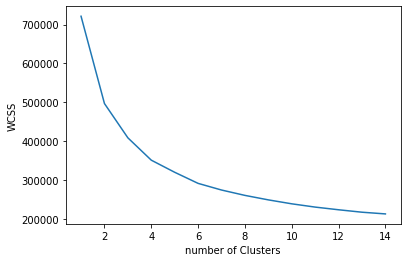

In [26]:
plt.plot(range(1,15), wcss)
plt.xlabel('number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Creating dataframe of predictions for analyzes

In [27]:
for x in range(len(predicted_h)):
        print('Home Team: ', x_test_h[x][0:1], 'Home Predicted: ', predicted_h[x], 'Home Actual: ', y_test_h[x])    

Home Team:  (23,) Home Predicted:  15.0 Home Actual:  28.0
Home Team:  (9,) Home Predicted:  45.0 Home Actual:  25.0
Home Team:  (3,) Home Predicted:  3.0 Home Actual:  26.0
Home Team:  (24,) Home Predicted:  9.0 Home Actual:  27.0
Home Team:  (26,) Home Predicted:  16.0 Home Actual:  21.0
Home Team:  (5,) Home Predicted:  10.0 Home Actual:  24.0
Home Team:  (11,) Home Predicted:  7.0 Home Actual:  17.0
Home Team:  (1,) Home Predicted:  20.0 Home Actual:  31.0
Home Team:  (24,) Home Predicted:  13.0 Home Actual:  20.0
Home Team:  (20,) Home Predicted:  30.0 Home Actual:  20.0
Home Team:  (7,) Home Predicted:  7.0 Home Actual:  20.0
Home Team:  (4,) Home Predicted:  7.0 Home Actual:  6.0
Home Team:  (21,) Home Predicted:  14.0 Home Actual:  24.0
Home Team:  (23,) Home Predicted:  28.0 Home Actual:  13.0
Home Team:  (8,) Home Predicted:  31.0 Home Actual:  28.0
Home Team:  (4,) Home Predicted:  16.0 Home Actual:  48.0
Home Team:  (1,) Home Predicted:  14.0 Home Actual:  31.0
Home Team:  

In [28]:
ht_names = []
act_score = []
pred_score = []
        
for x in range(len(predicted_h)):
        ht_names += [x_test_h[x][0:1]]
        act_score += [y_test_h[x]]
        pred_score += [predicted_h[x]]

In [29]:
df_results = pd.DataFrame(columns=['Home Team', 'Actual Score', 'Predicted Score'])
df_results

,Home Team,Actual Score,Predicted Score


In [30]:
df_results['Home Team'] = ht_names
df_results['Actual Score'] = act_score
df_results['Predicted Score'] = pred_score
df_results

,Home Team,Actual Score,Predicted Score
0,"(23,)",28.0,15.0
1,"(9,)",25.0,45.0
2,"(3,)",26.0,3.0
3,"(24,)",27.0,9.0
4,"(26,)",21.0,16.0
...,...,...,...
258,"(12,)",24.0,20.0
259,"(4,)",6.0,7.0
260,"(18,)",3.0,3.0
261,"(6,)",31.0,7.0


In [31]:
df_results['differance'] = df_results['Predicted Score'] - df_results['Actual Score']
df_results.head()

,Home Team,Actual Score,Predicted Score,differance
0,"(23,)",28.0,15.0,-13.0
1,"(9,)",25.0,45.0,20.0
2,"(3,)",26.0,3.0,-23.0
3,"(24,)",27.0,9.0,-18.0
4,"(26,)",21.0,16.0,-5.0


In [32]:
df_results.describe()

,Actual Score,Predicted Score,differance
count,263.000000,263.000000,263.000000
mean,22.650190,14.250951,-8.399240
std,10.843406,8.208039,12.811177
min,0.000000,0.000000,-52.000000
25%,16.000000,9.000000,-17.000000
50%,21.000000,13.000000,-10.000000
75%,31.000000,20.000000,0.000000
max,55.000000,45.000000,32.000000
